# Specfem2D Workstation Example

SeisFlows comes with some __Specfem2D synthetic examples__ to showcase the package. These examples are meant to be run on a __local machine__ (tested on a Linux workstation running CentOS 7, and an Apple Laptop running macOS 10.14.6).

The numerical solver we will use is: [SPECFEM2D](https://geodynamics.org/cig/software/specfem2d/). We'll also be working in our `seisflows` [Conda](https://docs.conda.io/en/latest/) environment, see the installation documentation page for instructions on how to install and activate the required Conda environment. 

-----------------------------------

In [ ]:
from IPython.display import Image  # To display .png files in the notebook

## Example \#1: Simple, default inversion
Example \#1 runs a 1-iteration synthetic inversion with 1 event and 1 station, used to illustrate misfit kernels in adjoint tomography.

The starting model (MODEL_INIT) and target model (MODEL_TRUE) are used to generate synthetics and data, respectively. Both models are homogeneous halfspace models with slightly varying P- and S-wave velocity values. Only Vp and Vs are updated during the example.

Misfit during Example \#1 is defined by a 'traveltime' misfit using the default preprocessing module. It also uses a gradient-descent optimization algorithm paired with a bracketing line search. No smoothing/regularization is applied to the gradient.

In [1]:
! seisflows examples 1  # print example help dialogue

No existing SPECFEM2D repo given, default to: /home/bchow/REPOSITORIES/seisflows/docs/notebooks/specfem2d

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @

### Running the example

You can either setup and run the example in separate tasks using the `seisflows examples setup` and `seisflows submit` commands, or by directly running the example after setup using the `examples run` command (illustrated below). 

Use the `-r` or `--specfem2d_repo` flag to point SeisFlows at an existing SPECFEM2D/ repository (with compiled binaries) if available. If not given, SeisFlows will automatically download, configure and compile SPECFEM2D in your current working directory.

In [ ]:
! seisflows examples setup 1 -r ${PATH_TO_SPECFEM2D}
! seisflows submit

# The above commands are the same as the below
! seisflows examples run 1 --specfem2d_repo ${PATH_TO_SPECFEM2D}

A successfully completed example problem will end with the following log messages:

In [2]:
%cd ~/Work/scratch/example_1
! ls

/home/bchow/Work/scratch/example_1
logs	parameters.yaml  sflog.txt    specfem2d
output	scratch		 sfstate.txt  specfem2d_workdir


In the `output/` directory, we can see our starting model (MODEL_INIT), our target model (MODEL_TRUE) and the updated model from our first iteration (MODEL_01) alongside the gradient that was used to create it (GRADIENT_01). 

In [3]:
! ls output
! echo
! ls output/MODEL_01

GRADIENT_01  MODEL_01  MODEL_INIT  MODEL_TRUE

proc000000_vp.bin  proc000000_vs.bin


Because we're working with SPECFEM2D, we can plot the models and gradients that were created during our workflow using the `seisflows plot2d` command. If we use the `--savefig` option we can also save the output .png files to disk. Because this docs page was made in a Jupyter Notebook, we need to use the IPython Image class to open the resulting .png file.

This figure shows the starting homogeneous halfspace model in Vs.

Figure(707.107x707.107)


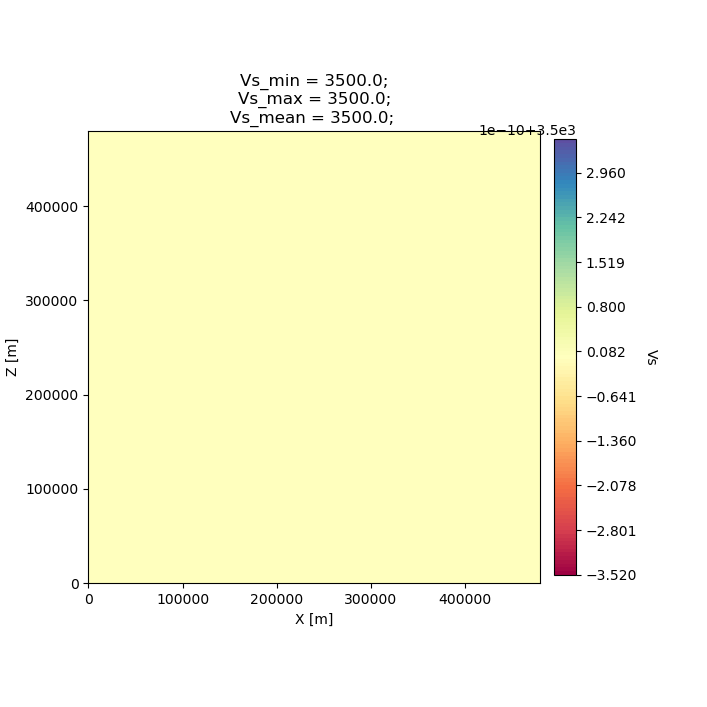

In [7]:
! seisflows plot2d MODEL_INIT vs --savefig m_init_vs.png
Image(filename='m_init_vs.png') 

Here we see the gradient created during the adjoint simulation.

Figure(707.107x707.107)


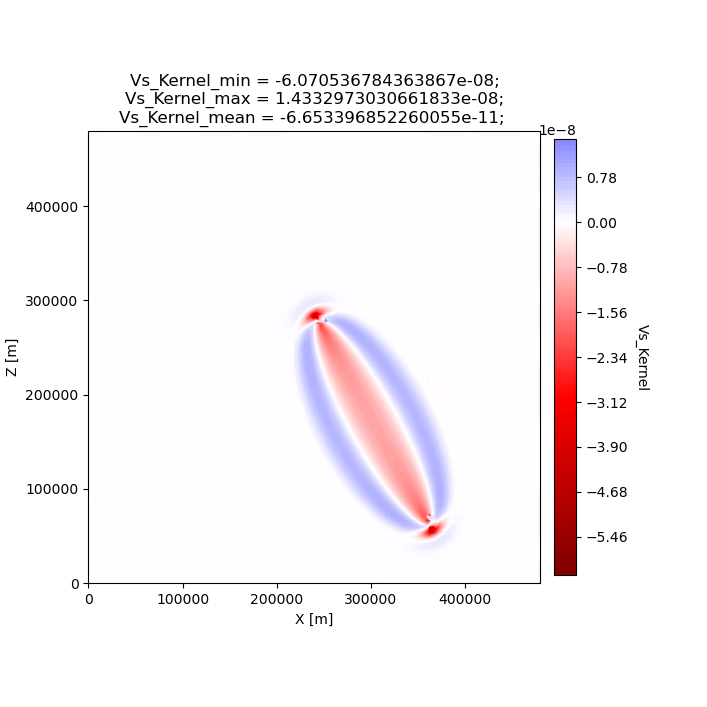

In [9]:
! seisflows plot2d GRADIENT_01 vs_kernel --savefig g_01_vs.png
Image(filename='g_01_vs.png') 

Finally we see the updated model, which is the sum of the initial model, and a scaled gradient.

Figure(707.107x707.107)


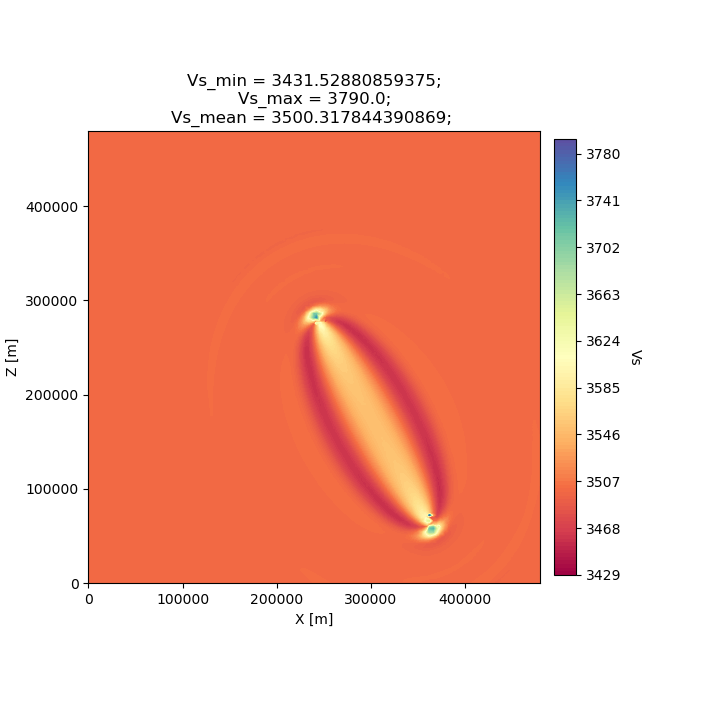

In [10]:
! seisflows plot2d MODEL_01 vs --savefig m_01_vs.png
Image(filename='m_01_vs.png') 

In [ ]:
! seisflows examples run 1 --nsta 10 --ntask 5 --niter 2

## Example \#2: Pyaflowa, L-BFGS inversion

Example \#2 runs a 2 iteration inversion with misfit quantification taken care of by the `Pyaflowa` preprocessing module. Optimization (i.e., model updates) are performed using the `L-BFGS` algorithm. This example is more complex than the default version of Example \#1, using multiple events, stations and iterations. Example \#2 also includes smoothing/regularization of the gradient before using it to perturb the starting velocity model.

In [12]:
! seisflows examples 2

No existing SPECFEM2D repo given, default to: /home/bchow/Work/scratch/example_1/specfem2d

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@         

You can run the example with the same command as shown for Example 1:

In [ ]:
! seisflows examples run 2 -r ${PATH_TO_SPECFEM2D}

In [17]:
%cd ~/Work/scratch/example_2
! ls

/home/bchow/Work/scratch/example_2
logs	parameters.yaml  sflog.txt    specfem2d
output	scratch		 sfstate.txt  specfem2d_workdir


In [18]:
! seisflows plot2d  # to check what models/gradients/kernels are avilable for plotting

                                     PLOT2D                                     
                                     //////                                     
Available models/gradients/kernels

GRADIENT_01
GRADIENT_02
MODEL_01
MODEL_02
MODEL_INIT
MODEL_TRUE


The starting model is a homogeneous halfspace but for Example \#2 the target model is a checkerboard.

Figure(707.107x707.107)


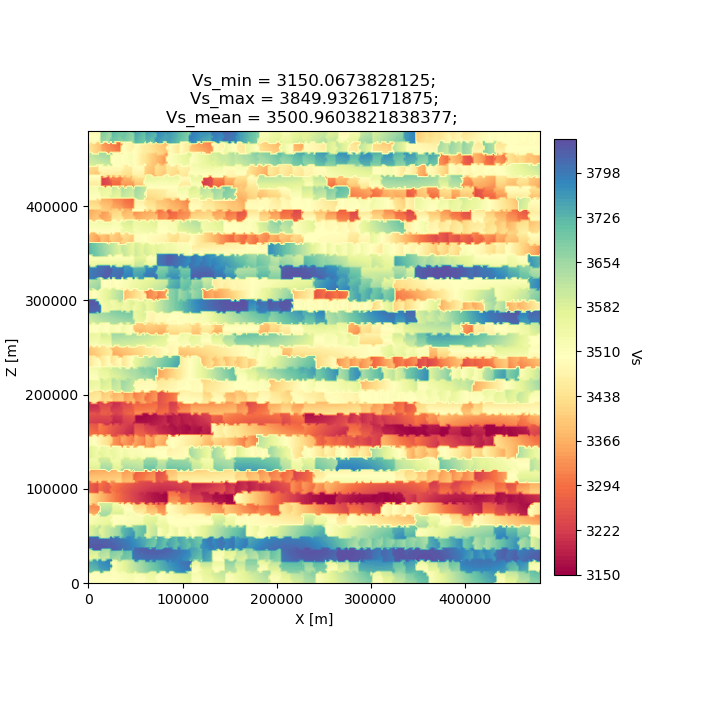

In [19]:
! seisflows plot2d MODEL_TRUE vs --savefig m_true_vs.png
Image(filename='m_true_vs.png') 

In the following gradient Vs kernel, we can see how the 5km x 5km smoothing blurs away some of the detail of the raw graident. The blue colors here suggest that the initial model needs to be sped up to best fit waveforms (and vice versa, red colors suggest slowing down the initial model).

Figure(707.107x707.107)


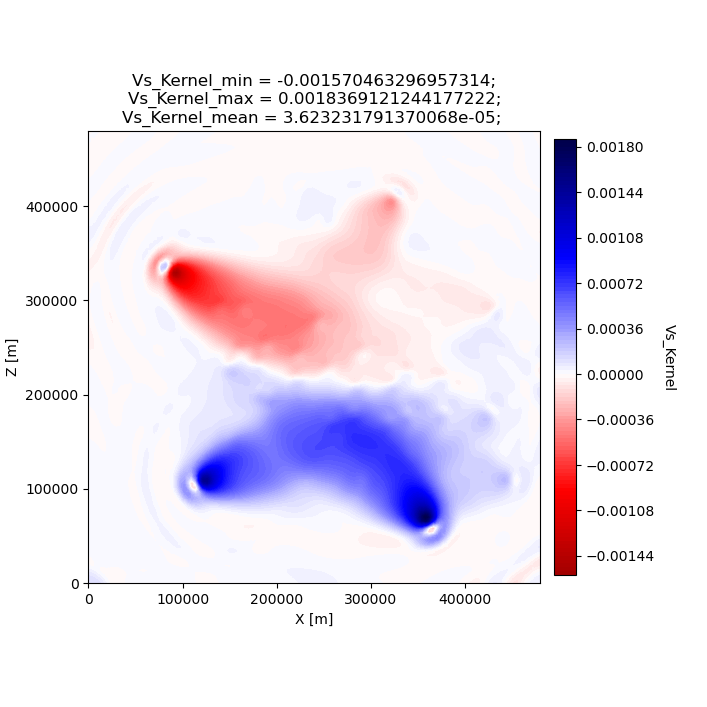

In [20]:
! seisflows plot2d GRADIENT_01 vs_kernel --savefig g_01_vs.png
Image(filename='g_01_vs.png') 

Figure(707.107x707.107)


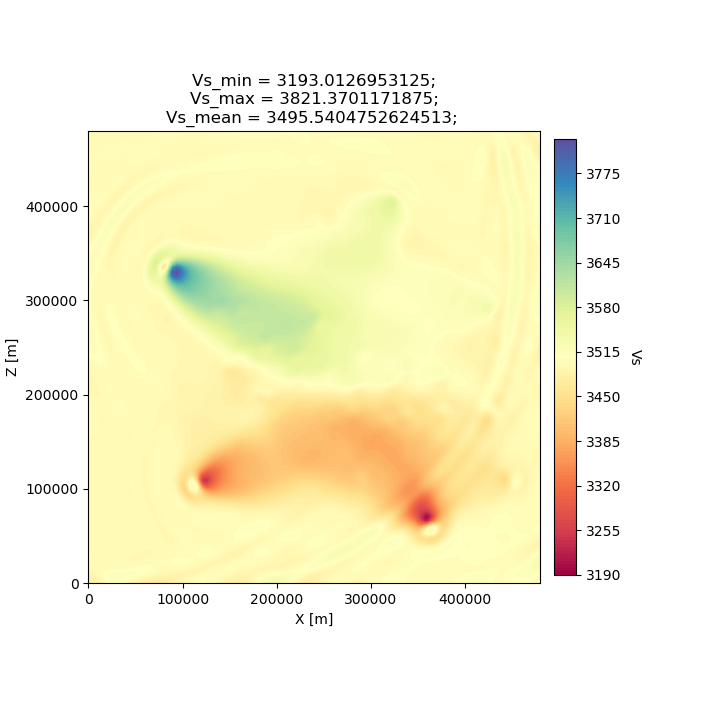

In [21]:
! seisflows plot2d MODEL_02 vs --savefig m_02_vs.png
Image(filename='m_02_vs.png') 